In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

# IPython Magic Functions
# will make plot outputs appear and be stored within the notebook.
%matplotlib inline 

# Defaults fot better plots
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

# Turn on interactive mode
plt.ion() 
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

### Abrindo os Datasets

In [2]:
dataset_name = "music4all"
dataset_relative_location = "../../dataset"

dataset_path = Path(dataset_relative_location) / dataset_name

In [3]:
### Get datset CSVs
csvsPattern = "*.csv"
csvs = list(dataset_path.glob(csvsPattern))
csvs

[PosixPath('../../dataset/music4all/id_tags.csv'),
 PosixPath('../../dataset/music4all/id_metadata.csv'),
 PosixPath('../../dataset/music4all/id_information.csv'),
 PosixPath('../../dataset/music4all/listening_history.csv'),
 PosixPath('../../dataset/music4all/id_lang.csv'),
 PosixPath('../../dataset/music4all/id_genres.csv')]

### Carrega os datasets em dataframes

In [4]:
datasets = {}

for csv in csvs:
    datasets[csv.stem] = pd.read_csv(csv, delimiter="\t")

### Quantos artistas, músicas e álbuns temos no dataset ?

In [5]:
# Selecting an appropriate dataframe for the task

datasets.keys()

dict_keys(['id_tags', 'id_metadata', 'id_information', 'listening_history', 'id_lang', 'id_genres'])

In [20]:
song_info = pd.merge(datasets['id_information'], datasets['id_genres'], on='id')

In [8]:
datasets['listening_history'].describe()

,user,song,timestamp
count,5109592,5109592,5109592
unique,14127,99596,122340
top,user_qVTVgBOn,32m5suoC94ytD8Ed,2019-02-08 20:35
freq,500,82871,175


In [12]:
lh = datasets['listening_history']
lh

,user,song,timestamp
0,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-20 12:28
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09
...,...,...,...
5109587,user_zzWscYTy,BBiswLufo26YQCT7,2019-01-10 15:57
5109588,user_zzWscYTy,5ZHgff3sjETIiedr,2019-01-10 16:21
5109589,user_zzWscYTy,m4O1iLh6fC43xjRy,2019-01-10 16:48
5109590,user_zzWscYTy,mvUaP8k67qOFfA65,2019-01-10 21:13


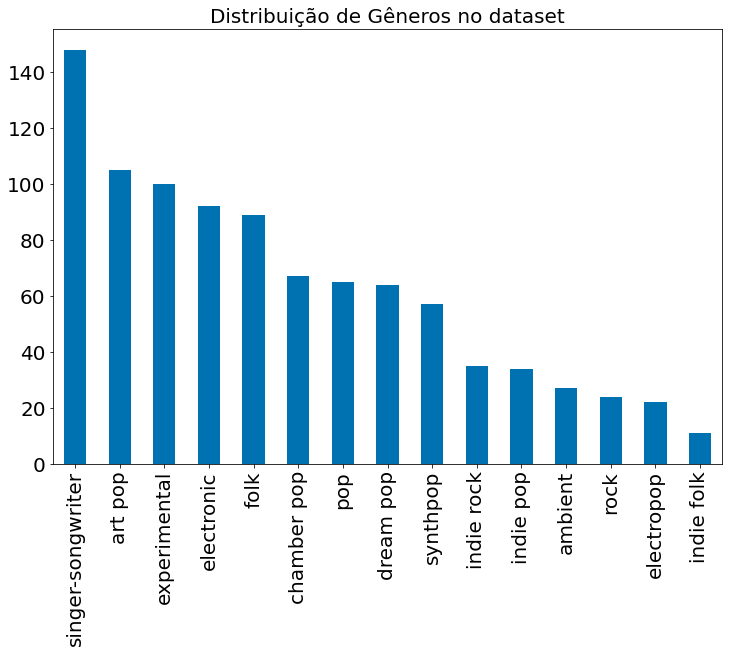

In [48]:
def plot_genre_distribution(df):
    # Needs a genre column
    genres = ",".join(df['genres']).split(",")
    genres_count = pd.Series(genres).value_counts()
    most_popular_genres = genres_count[:100]
    # Plot the 15 most popular
    ax = most_popular_genres[:15].plot.bar(title="Distribuição de Gêneros no dataset")

plot_genre_distribution(user1_songs)

In [30]:
## Selecting one user to check its listening history
user1 = lh[lh["user"] == "user_007XIjOr"]
user1

,user,song,timestamp
0,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-20 12:28
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09
...,...,...,...
435,user_007XIjOr,1gEApUktf4hN25zC,2019-03-05 23:14
436,user_007XIjOr,LxpGP4Ys3MgvhqRZ,2019-03-05 23:32
437,user_007XIjOr,LxpGP4Ys3MgvhqRZ,2019-03-05 23:32
438,user_007XIjOr,LxpGP4Ys3MgvhqRZ,2019-03-05 23:38


In [31]:
## Ranaming column
renamed_df = user1.rename(columns = {'song':'id'})
renamed_df

,user,id,timestamp
0,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-20 12:28
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09
...,...,...,...
435,user_007XIjOr,1gEApUktf4hN25zC,2019-03-05 23:14
436,user_007XIjOr,LxpGP4Ys3MgvhqRZ,2019-03-05 23:32
437,user_007XIjOr,LxpGP4Ys3MgvhqRZ,2019-03-05 23:32
438,user_007XIjOr,LxpGP4Ys3MgvhqRZ,2019-03-05 23:38


In [34]:
user1_songs = pd.merge(renamed_df, song_info, on='id')

In [61]:
def get_transition_timestamps(df):
    list_of_lists = []
    
    # first row is a transition to itself, # source, # target, # timestamp
    list_of_lists.append([df.loc[0, "song"], df.loc[0, "song"],  df.loc[0, "timestamp"]])

    # from 0 to n-1
    for i in range(0, len(df) - 1) :
        list_of_lists.append([df.loc[i, "song"], df.loc[i + 1, "song"],  df.loc[i + 1, "timestamp"]])

    return list_of_lists    

def get_transition_df(transition_ts):
    return pd.DataFrame(transition_ts, columns=["source", "target", "timestamp"])

transition_ts = get_transition_timestamps(user1_songs)
transition_ts

[['Your Best American Girl', 'Your Best American Girl', '2019-02-20 12:28'],
 ['Your Best American Girl', 'Your Best American Girl', '2019-02-26 18:09'],
 ['Your Best American Girl', 'LIKE HELL', '2019-02-20 12:35'],
 ['LIKE HELL', 'LIKE HELL', '2019-02-25 13:25'],
 ['LIKE HELL', 'LIKE HELL', '2019-02-28 23:25'],
 ['LIKE HELL', 'LIKE HELL', '2019-02-28 23:27'],
 ['LIKE HELL', 'LIKE HELL', '2019-02-28 23:28'],
 ['LIKE HELL', 'LIKE HELL', '2019-03-02 00:13'],
 ['LIKE HELL', 'LIKE HELL', '2019-03-05 12:54'],
 ['LIKE HELL', 'The Saxophone Song', '2019-02-20 12:48'],
 ['The Saxophone Song', "Gurdjieff's Daughter", '2019-02-20 12:52'],
 ["Gurdjieff's Daughter", "Gurdjieff's Daughter", '2019-02-21 14:35'],
 ["Gurdjieff's Daughter", 'The Wedding List', '2019-02-20 13:09'],
 ['The Wedding List', 'The Wedding List', '2019-02-20 13:13'],
 ['The Wedding List', 'The Wedding List', '2019-02-22 12:59'],
 ['The Wedding List', 'The Wedding List', '2019-02-25 02:18'],
 ['The Wedding List', 'Les Jeux to 

In [63]:
transitions = pd.DataFrame(transition_ts, columns=["source", "target", "timestamp"])

transitions

,source,target,timestamp
0,Your Best American Girl,Your Best American Girl,2019-02-20 12:28
1,Your Best American Girl,Your Best American Girl,2019-02-26 18:09
2,Your Best American Girl,LIKE HELL,2019-02-20 12:35
3,LIKE HELL,LIKE HELL,2019-02-25 13:25
4,LIKE HELL,LIKE HELL,2019-02-28 23:25
5,LIKE HELL,LIKE HELL,2019-02-28 23:27
6,LIKE HELL,LIKE HELL,2019-02-28 23:28
7,LIKE HELL,LIKE HELL,2019-03-02 00:13
8,LIKE HELL,LIKE HELL,2019-03-05 12:54
9,LIKE HELL,The Saxophone Song,2019-02-20 12:48


In [6]:
df_info = datasets["id_information"]

In [7]:
unique = df_info.nunique()
print(unique)
print(f"\nSongs: {unique[0]}\nArtists: {unique[1]}\nAlbuns: {unique[3]}")

id            109269
artist         16269
song           87915
album_name     38363
dtype: int64

Songs: 109269
Artists: 16269
Albuns: 38363


<AxesSubplot:title={'center':'Musicas, artistas, musicas únicas e albuns'}>

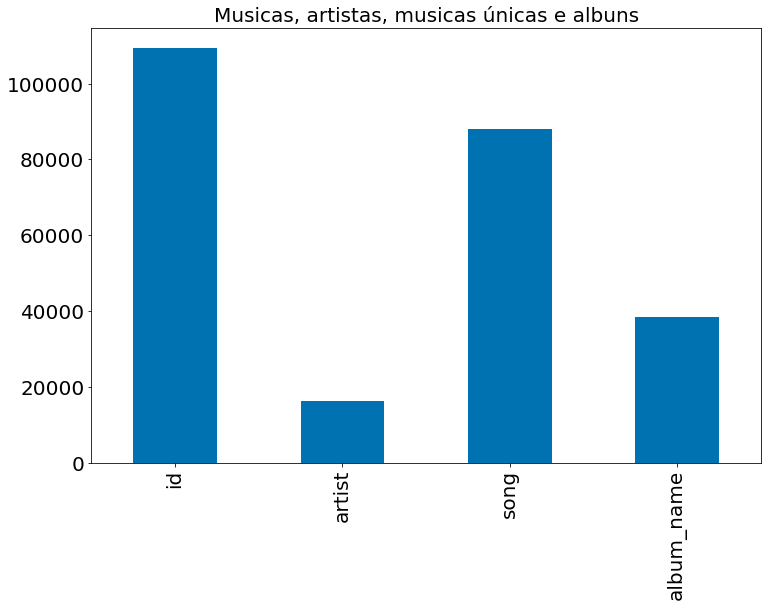

In [8]:
unique.plot.bar(title="Musicas, artistas, musicas únicas e albuns")

### Qual a distribuição de gêneros ?

In [10]:
genres_df = datasets["id_genres"]

In [12]:
genres = ",".join(genres_df['genres']).split(",")
genres[:10]

['pop',
 'underground hip hop',
 'hard rock',
 'rock',
 'classic rock',
 'symphonic metal',
 'power metal',
 'symphonic power metal',
 'post-punk',
 'new wave']

In [13]:
# Genres comes in a list for every song separated by commas
# We join into a big string, then count each genre. A genre can have multiple words
genres_count = pd.Series(genres).value_counts()
most_popular_genres = genres_count[:100]

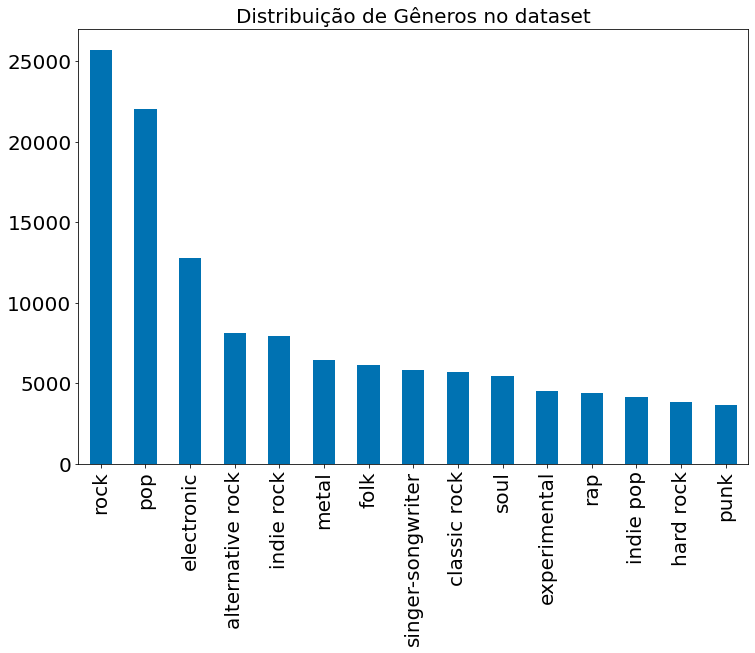

In [18]:
ax = most_popular_genres[:15].plot.bar(title="Distribuição de Gêneros no dataset")

In [17]:
most_popular_genres[:5].sum()

76559

In [16]:
genres_count.sum()

256546

### Qual a distribuição das tags ?

In [79]:
tags_df = datasets["id_tags"]
tags_df

,id,tags
0,0009fFIM1eYThaPg,"pop,british,female vocalists,dance,cheryl cole"
1,0010xmHR6UICBOYT,"instrumental hip-hop,underground hip hop,instr..."
2,002Jyd0vN4HyCpqL,"hard rock,rock,classic rock,american artist"
3,006TYKNjNxWjfKjy,"symphonic metal,power metal,symphonic power metal"
4,007LIJOPQ4Sb98qV,"post-punk,new wave,1985"
...,...,...
109264,zzyyPUs7hC9Nz2e1,"hardcore punk,punk,hardcore,punk rock"
109265,zzz0n04uuTUA7fNh,"pop,&lt;3,omg"
109266,zzzj3LYaZtYtbzSr,"female vocalists,indie,singer-songwriter,piano..."
109267,zzznMjZAKnJJXQSj,"synthpop,80s,remix,pop"


In [89]:
# Separando as Tags
tags = ",".join(tags_df['tags']).split(",")
tags[:10]

['pop',
 'british',
 'female vocalists',
 'dance',
 'cheryl cole',
 'instrumental hip-hop',
 'underground hip hop',
 'instrumental hip hop',
 'instrumental hiphop',
 'hard rock']

In [90]:
tags_count = pd.Series(tags).value_counts()
most_popular_tags = tags_count[:100]
most_popular_tags

rock              25731
pop               22013
indie             17539
alternative       13114
electronic        12769
                  ...  
japanese            936
trap                917
male vocalists      881
garage rock         878
disco               856
Length: 100, dtype: int64

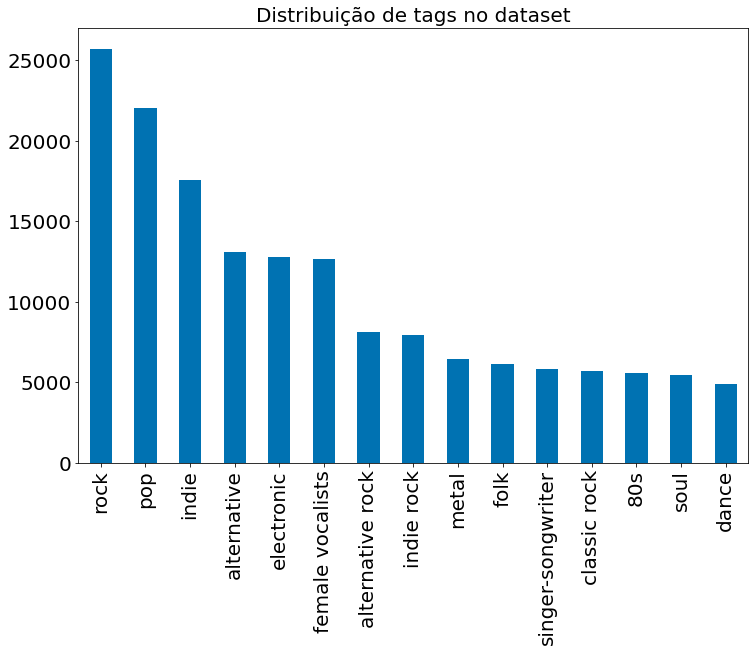

In [86]:
ax = most_popular_tags[:15].plot.bar(title="Distribuição de tags no dataset")